In [10]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

In [11]:
with fits.open("image.fits", ignore_missing_end=True, ignore_missing_blank=True) as hdul:
    data = hdul[0].data

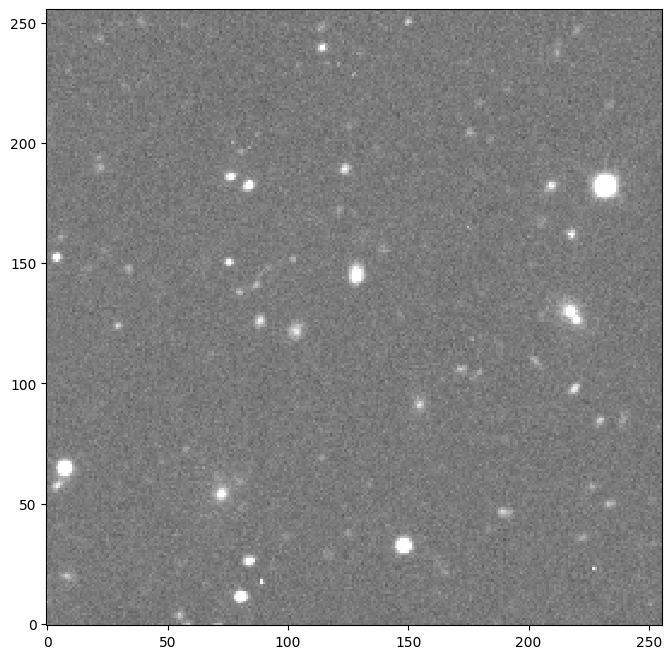

In [36]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
plt.savefig('figure1.png')

In [12]:
bkg = sep.Background(data)

In [13]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [14]:
bkg_image = bkg.back()

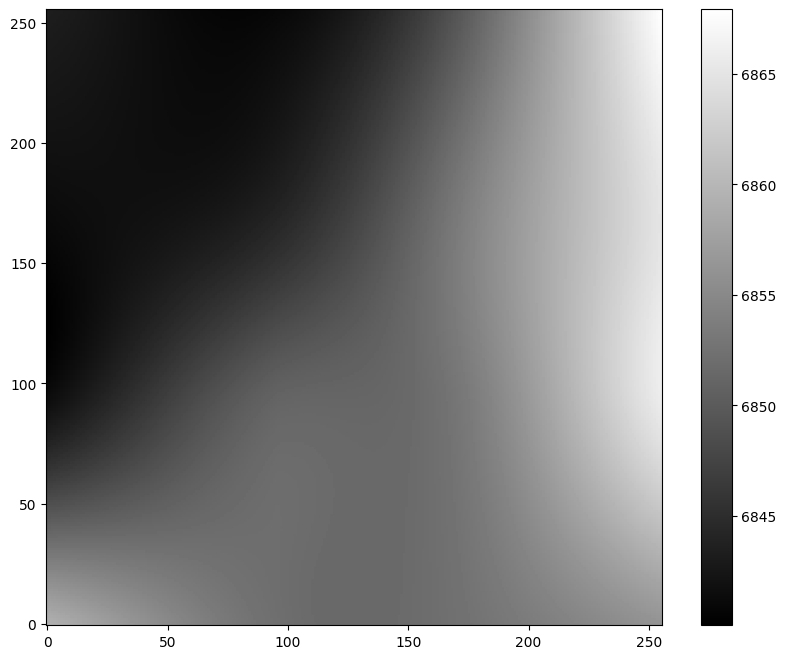

In [37]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('figure2.png')

In [16]:
bkg_rms = bkg.rms()

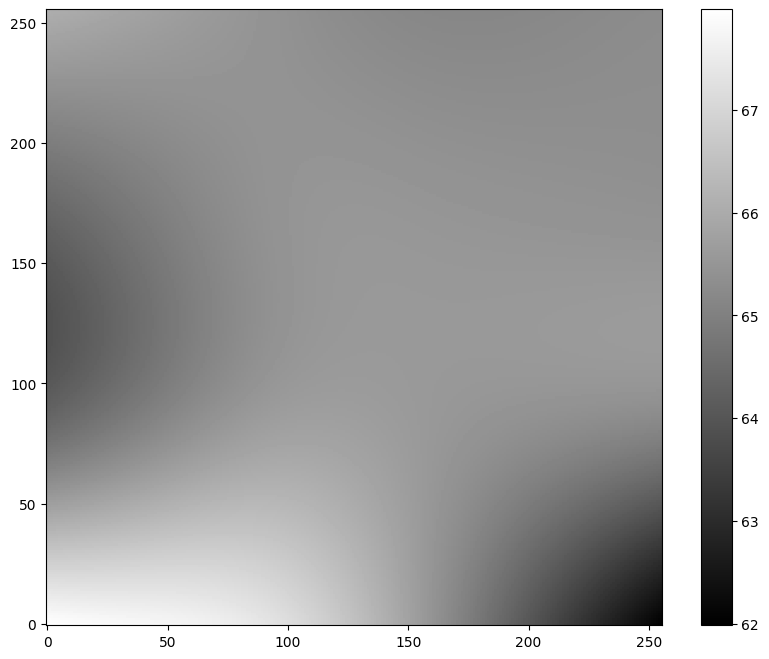

In [38]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('figure3.png')

In [18]:
data_sub = data - bkg

In [19]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [20]:
len(objects)

68

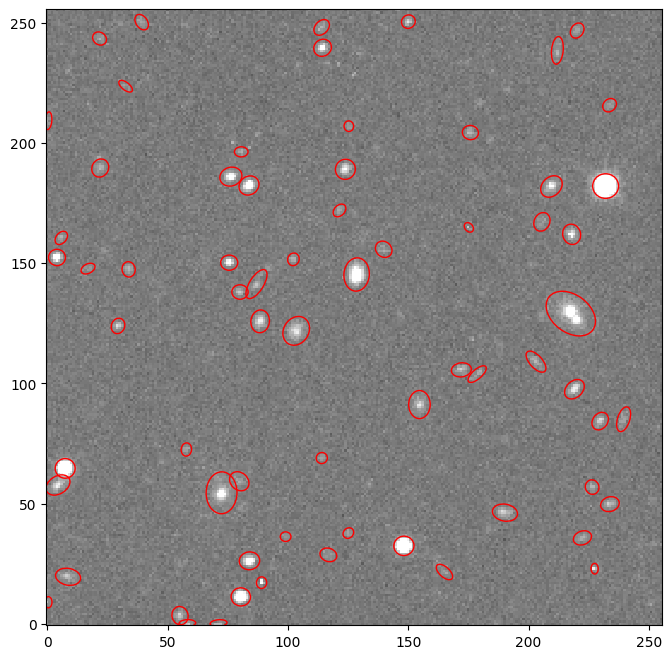

In [39]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('figure4.png')

In [30]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [26]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [28]:
for i in range(10):
    print("Objects {:d}: Flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

Objects 0: Flux = 2249.159297 +/- 291.027802
Objects 1: Flux = 3092.220430 +/- 291.592204
Objects 2: Flux = 5949.868379 +/- 356.562003
Objects 3: Flux = 1851.426582 +/- 295.028816
Objects 4: Flux = 72736.386914 +/- 440.172206
Objects 5: Flux = 3860.756152 +/- 352.163162
Objects 6: Flux = 6418.913789 +/- 357.458973
Objects 7: Flux = 2210.707656 +/- 350.791223
Objects 8: Flux = 2741.607227 +/- 352.277746
Objects 9: Flux = 20916.875566 +/- 376.966138
